# Experimentos con Dataset Disvoice + Edad y Sexo
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/EdadYSexo*
* Módulo de carga de datos: */src/cargaDatosEdSx.py*
     * Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice + Edad y Sexo [18]
     
* **Se consiguen mejores resultados con VT+ADA al igual que antes.**

* **El mejor resultado de los anteriores experimentos (VT+AdaBOOST), sigue siendo el mejor: AUC 0.884. En este caso el mejor experimento se logra con el mismo proceso y se obtiene el mismo resultado : 0.884**

<a id="index"></a>
## Índice del notebook
1. [Repetición experimentos #1 con este Dataset](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [Grid Search \ Seleckt KBest + RF](#skrf)
 ----------------------

In [1]:
from cargaDatosEdSx import *
import cargaDatosEdSx
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

# 1. Todo igual a E1 <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
En General: mejoras muy pequeñas en muy pocos casos y por la mayoría igual o un poco peor.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [2]:
conjuntos = [x for x in os.listdir('CaracteristicasExtraidas/EdadYSexo') if x.endswith('npy')]

In [33]:
tipoDatos = "cargaDatosEdSx"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [34]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [35]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.410000,0.570000,0.650000,0.500000,0.620000,0.700000,0.510000,0.700000
art_w_atleta,0.660000,0.540000,0.590000,0.500000,0.580000,0.610000,0.460000,0.610000
art_w_braso,0.510000,0.570000,0.640000,0.520000,0.560000,0.520000,0.530000,0.570000
art_w_campana,0.570000,0.550000,0.640000,0.480000,0.610000,0.650000,0.480000,0.610000
art_w_gato,0.520000,0.530000,0.640000,0.520000,0.650000,0.600000,0.530000,0.650000
art_w_petaka,0.510000,0.520000,0.650000,0.470000,0.560000,0.620000,0.470000,0.690000
fon_rt,0.520000,0.530000,0.590000,0.480000,0.600000,0.760000,0.470000,0.610000
fon_v_A,0.620000,0.573333,0.636667,0.563333,0.640000,0.616667,0.466667,0.616667
fon_v_E,0.550000,0.570000,0.640000,0.516667,0.613333,0.600000,0.503333,0.606667
fon_v_I,0.563333,0.586667,0.630000,0.520000,0.606667,0.610000,0.513333,0.643333


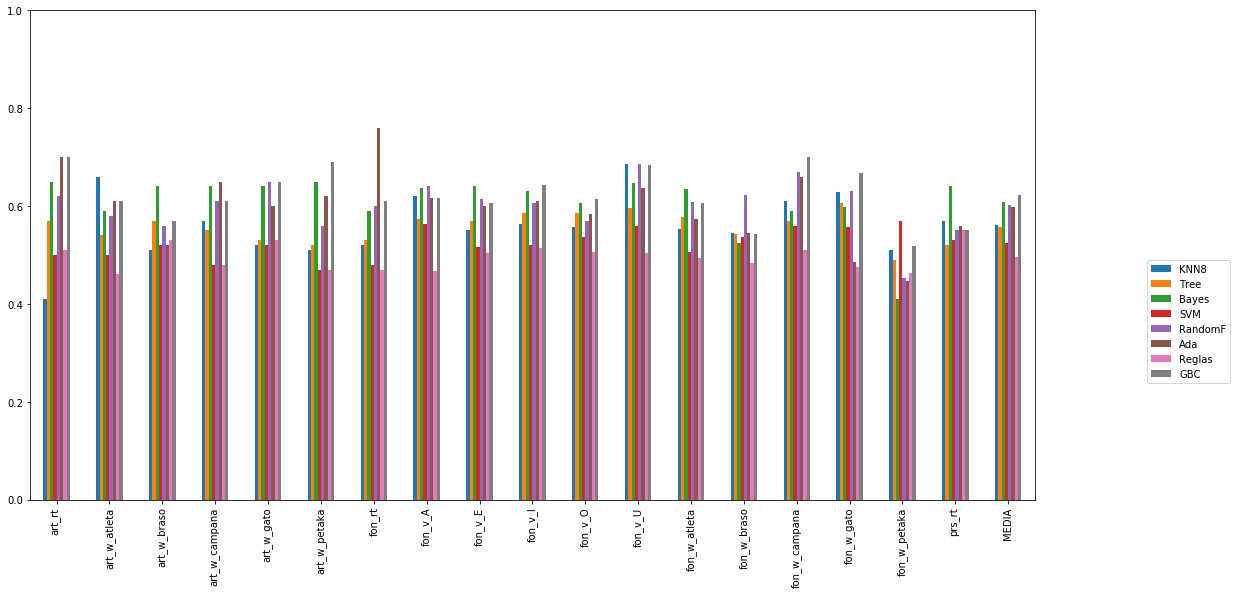

In [36]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [7]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [8]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.550000,0.610000,0.650000,0.630000,0.610000,0.700000,0.380000,0.710000
art_w_atleta,0.600000,0.540000,0.590000,0.550000,0.620000,0.610000,0.510000,0.600000
art_w_braso,0.560000,0.580000,0.640000,0.610000,0.580000,0.520000,0.530000,0.560000
art_w_campana,0.530000,0.560000,0.640000,0.570000,0.540000,0.650000,0.510000,0.620000
art_w_gato,0.640000,0.530000,0.640000,0.640000,0.680000,0.600000,0.480000,0.630000
art_w_petaka,0.580000,0.540000,0.650000,0.580000,0.580000,0.610000,0.540000,0.670000
fon_rt,0.540000,0.540000,0.590000,0.490000,0.650000,0.760000,0.390000,0.600000
fon_v_A,0.593333,0.570000,0.636667,0.620000,0.653333,0.613333,0.556667,0.613333
fon_v_E,0.600000,0.590000,0.640000,0.633333,0.646667,0.600000,0.473333,0.623333
fon_v_I,0.633333,0.580000,0.630000,0.623333,0.593333,0.610000,0.553333,0.616667


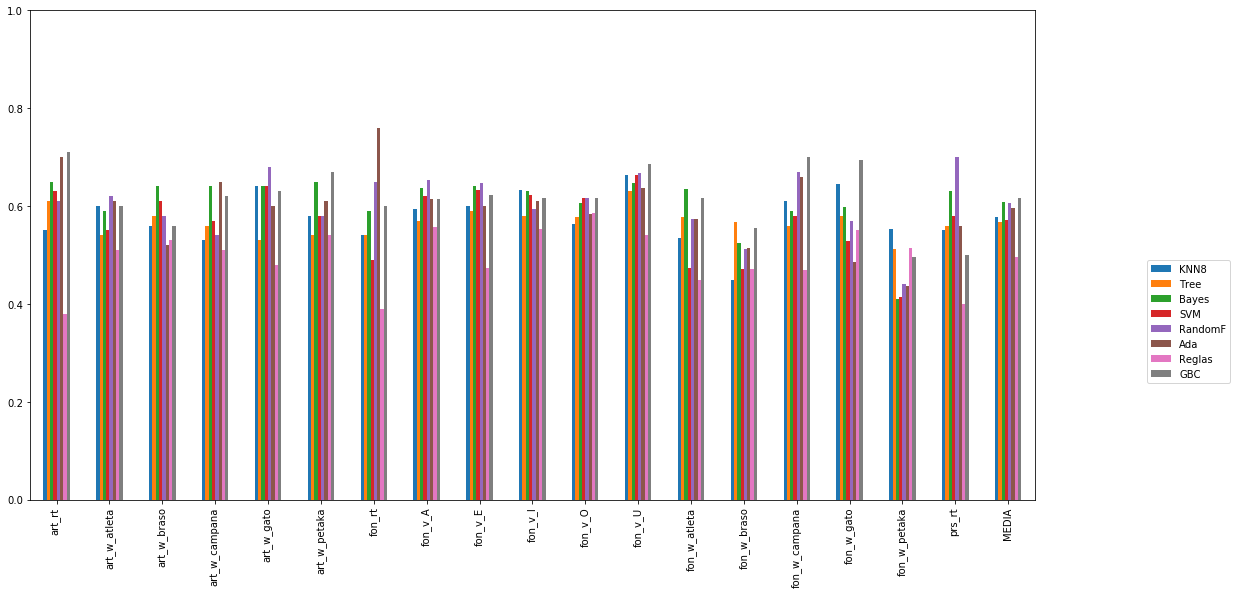

In [9]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [10]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [11]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.466000,0.580000,0.694000,0.596000,0.644000,0.784000,0.500000,0.764000
art_w_atleta,0.696000,0.530000,0.640000,0.526000,0.668000,0.708000,0.540000,0.688000
art_w_braso,0.520000,0.520000,0.692000,0.506000,0.532000,0.536000,0.540000,0.656000
art_w_campana,0.594000,0.590000,0.678000,0.530000,0.646000,0.696000,0.530000,0.688000
art_w_gato,0.574000,0.580000,0.672000,0.418000,0.684000,0.612000,0.450000,0.700000
art_w_petaka,0.562000,0.550000,0.716000,0.544000,0.676000,0.616000,0.490000,0.720000
fon_rt,0.568000,0.560000,0.588000,0.504000,0.606000,0.836000,0.520000,0.676000
fon_v_A,0.604667,0.576667,0.685333,0.600222,0.671556,0.684444,0.503333,0.665778
fon_v_E,0.545333,0.556667,0.713556,0.517778,0.638444,0.640444,0.473333,0.665333
fon_v_I,0.552889,0.586667,0.668000,0.543556,0.656222,0.628889,0.576667,0.640000


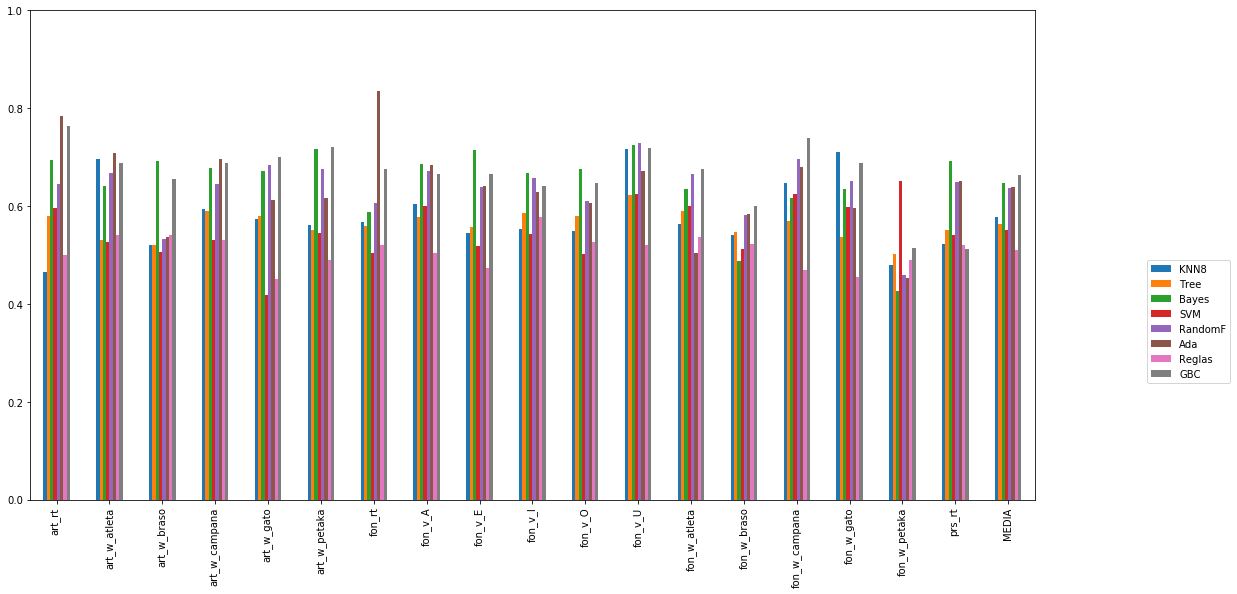

In [12]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [13]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [14]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.670000,0.610000,0.694000,0.756000,0.708000,0.784000,0.540000,0.756000
art_w_atleta,0.658000,0.530000,0.640000,0.684000,0.718000,0.708000,0.420000,0.696000
art_w_braso,0.600000,0.590000,0.692000,0.672000,0.516000,0.536000,0.480000,0.660000
art_w_campana,0.542000,0.550000,0.674000,0.700000,0.620000,0.696000,0.460000,0.676000
art_w_gato,0.696000,0.530000,0.672000,0.672000,0.692000,0.616000,0.470000,0.700000
art_w_petaka,0.630000,0.630000,0.716000,0.704000,0.672000,0.616000,0.530000,0.688000
fon_rt,0.568000,0.550000,0.588000,0.452000,0.560000,0.836000,0.490000,0.672000
fon_v_A,0.636667,0.583333,0.684889,0.673778,0.694889,0.679556,0.520000,0.664000
fon_v_E,0.599778,0.573333,0.713556,0.706222,0.710444,0.638667,0.516667,0.658222
fon_v_I,0.694222,0.583333,0.668000,0.677333,0.679778,0.628889,0.523333,0.647556


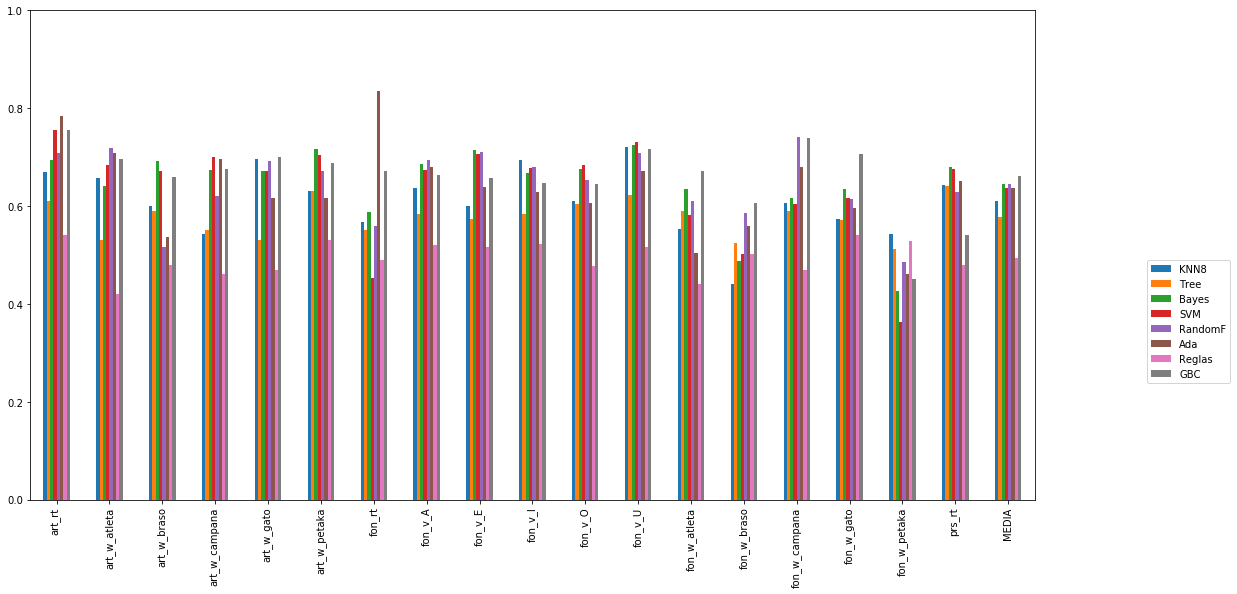

In [15]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. **Mejores resultados normalizando**. Peores que Disvoice Original. SCORING:AUC
Peor resultado que sin añadir los atributos edad y sexo. Mejor-> **fon_v_U 0.7213**

In [16]:
def best_to_panda(mej):
    return pd.DataFrame.from_dict(mej, orient='index',columns=['SCORE']).sort_values(by=['SCORE'], ascending=False)

In [17]:
ex = Experimenter()

In [18]:
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosEdSx,svm.SVC(),param_grid, verbose=False, normalizar=True)

In [19]:
best_to_panda(bestsOrz)

,SCORE
fon_v_U,0.721333
fon_w_campana,0.684000
fon_v_E,0.660444
fon_v_I,0.656889
art_rt,0.652000
fon_w_gato,0.647917
art_w_atleta,0.628000
art_w_gato,0.620000
fon_v_O,0.614222
fon_w_atleta,0.614000


**¿Sobreajuste?** ¿Por qué puede darse?

## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC

In [20]:
modulo = cargaDatosEdSx

In [21]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, K=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [22]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.760000,0.744000,0.756000,0.726000
art_w_atleta,0.672000,0.692000,0.684000,0.640000
art_w_braso,0.544000,0.628000,0.672000,0.592000
art_w_campana,0.692000,0.668000,0.700000,0.620000
art_w_gato,0.616000,0.700000,0.672000,0.698000
art_w_petaka,0.580000,0.692000,0.704000,0.676000
fon_rt,0.884000,0.668000,0.452000,0.646000
fon_v_A,0.685778,0.667556,0.673778,0.668000
fon_v_E,0.652000,0.659111,0.706222,0.643778
fon_v_I,0.628889,0.630222,0.677333,0.638000


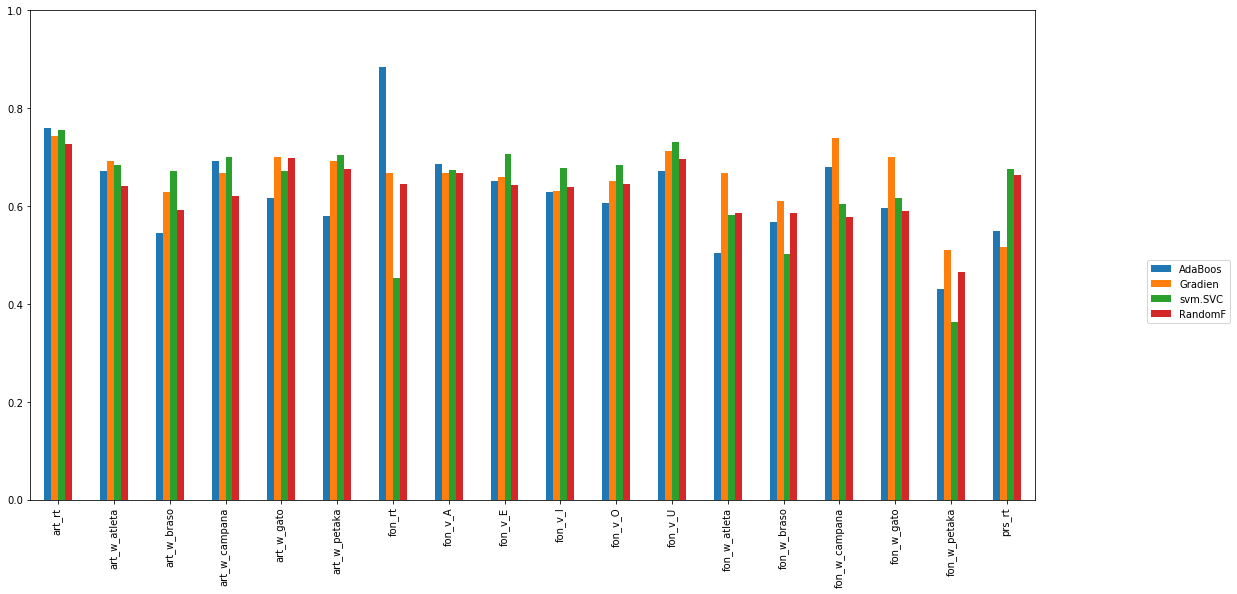

In [23]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [24]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(cargaDatosEdSx) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(cargaDatosEdSx, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(cargaDatosEdSx) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.666000,0.648000,0.756000,0.714000
art_w_atleta,0.556000,0.568000,0.712000,0.610000
art_w_braso,0.552000,0.540000,0.640000,0.568000
art_w_campana,0.570000,0.658000,0.660000,0.682000
art_w_gato,0.542000,0.612000,0.704000,0.642000
art_w_petaka,0.536000,0.488000,0.664000,0.544000
fon_rt,0.516000,0.608000,0.472000,0.602000
fon_v_A,0.665778,0.662889,0.727111,0.679778
fon_v_E,0.682000,0.678000,0.757778,0.673778
fon_v_I,0.659556,0.668889,0.740000,0.642889


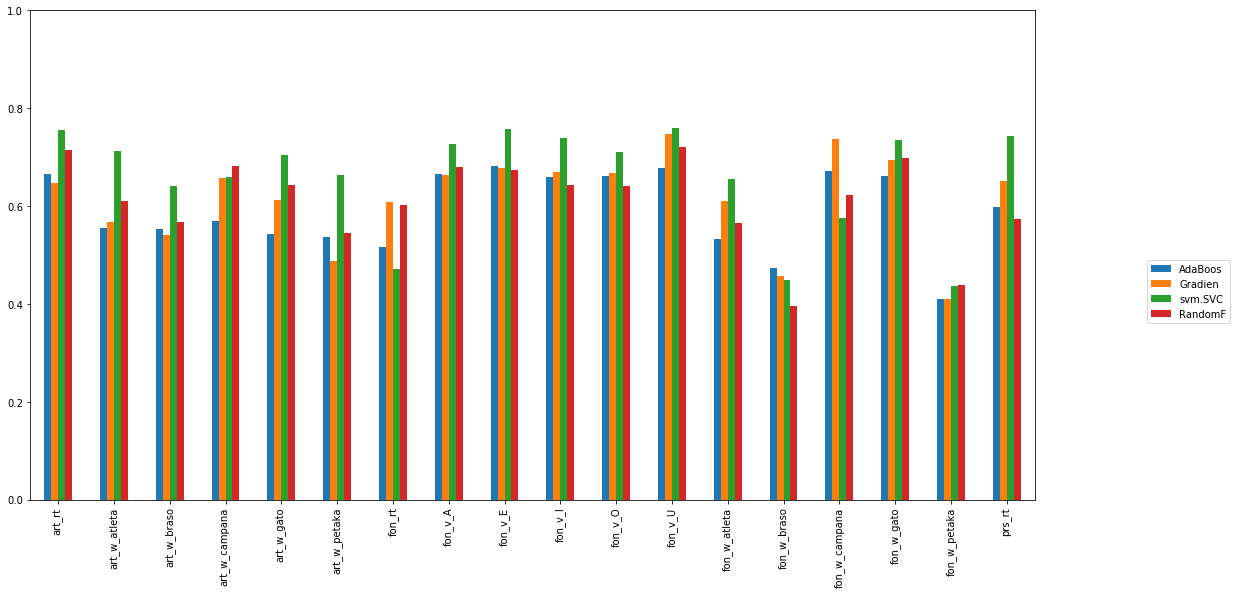

In [25]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejor resultado sin normalizar**. Fon_rt: 0.86 SCORING: AUC

In [26]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.01, 0.05, 0.08, 0.13, 0.16, 0.2 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid, verbose=False, normalizar=False)

In [27]:
best_to_panda(bestsGsVtAda)

,SCORE
fon_rt,0.860000
art_w_campana,0.752000
art_rt,0.740000
art_w_atleta,0.708000
fon_v_A,0.701778
fon_w_campana,0.692000
fon_v_U,0.646222
fon_v_E,0.637333
prs_rt,0.616000
art_w_gato,0.616000


#### Normalizando

In [28]:
ex = Experimenter()
bestsGsVtAda = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAda)

,SCORE
fon_rt,0.828000
art_w_atleta,0.728000
art_rt,0.720000
fon_w_campana,0.696000
art_w_campana,0.688000
fon_v_U,0.675556
fon_v_E,0.659556
fon_v_I,0.648889
fon_v_A,0.638889
fon_v_O,0.629778


## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado encontrado para RF. art_rt, AUC. Normalizando. 

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 25,
 'select__k': 22}

In [29]:
ex = Experimenter()
param_grid = dict(select__k=[5,10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosEdSx, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)

,SCORE
art_rt,0.748000
fon_v_A,0.731556
fon_v_U,0.723111
fon_v_I,0.710889
fon_w_campana,0.696000
fon_w_gato,0.695833
fon_v_E,0.692444
art_w_gato,0.688000
fon_v_O,0.677556
art_w_atleta,0.654000


**Depende de splits el roc es mucho mejor o mucho peor**: Si que puede significar que dependiendo de la estratificacion que se haga puedan mejorar mucho los resutlados.

### Mejor resultado

In [30]:
datos = cargaDatosEdSx.load_fon_rt()
X = datos.data
y = datos.target
pip = Pipeline([('select', VarianceThreshold(0.08)),('clf', AdaBoostClassifier())])
cross_val_score(pip,X,y,cv=10,scoring='roc_auc').mean()

0.8840000000000001